## Exploratory Data Analysis

In [298]:
import pandas as pd
past = pd.read_csv("./dat/online_shoppers_intention.csv.gz")

In [299]:
past.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [300]:
past.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [301]:
d = {'Feb':1, 'Mar':2, 'May':4, 'June':5, 'Jul':6, 'Aug':7, 'Sep':8, 'Oct':9, 'Nov':10, 'Dec':11,}

In [302]:
past['Month'] = past['Month'].map(d)

In [303]:
past['Month'].value_counts()

4     3364
10    2998
2     1907
11    1727
9      549
8      448
7      433
6      432
5      288
1      184
Name: Month, dtype: int64

In [304]:
# convert all object types to numeric one-hot coded. 

catCols = [col for col in past.columns if past[col].dtype=="O"]

from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()

for item in catCols:
    past[item] = lb_make.fit_transform(past[item])

In [305]:
# convert all boolean types to numeric one-hot coded. 

past['Revenue'] = pd.get_dummies(past['Revenue'],drop_first=1)
past['Weekend'] = pd.get_dummies(past['Weekend'],drop_first=1)


In [306]:
past.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,1,1,1,1,1,2,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,1,2,2,1,2,2,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,1,4,1,9,3,2,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,1,3,2,2,4,2,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,1,3,3,1,4,2,1,0


In [307]:
past.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [308]:
past.shape

(12330, 18)

In [309]:
past.isnull().values.any()

False

In [310]:
past.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,6.651987,2.124006,2.357097,3.147364,4.069586,1.718329,0.232603,0.154745
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,3.392841,0.911325,1.717277,2.401591,4.025169,0.690759,0.422509,0.361676
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,4.000000,2.000000,2.000000,1.000000,2.000000,2.000000,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,2.000000,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,10.000000,3.000000,2.000000,4.000000,4.000000,2.000000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,11.000000,8.000000,13.000000,9.000000,20.000000,2.000000,1.000000,1.000000


Administrative
Skew : 1.96


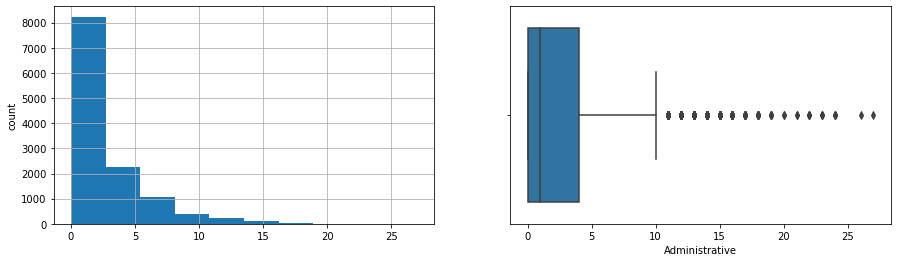

Administrative_Duration
Skew : 5.62


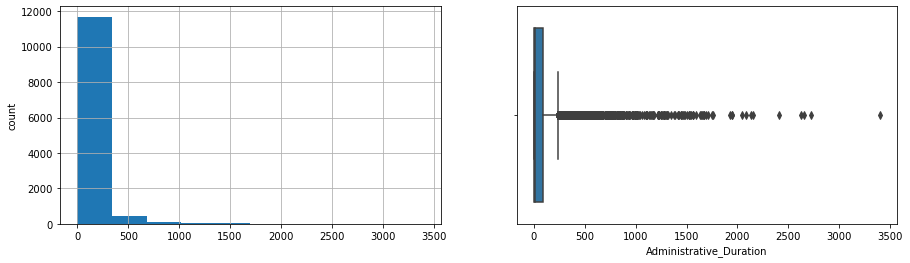

Informational
Skew : 4.04


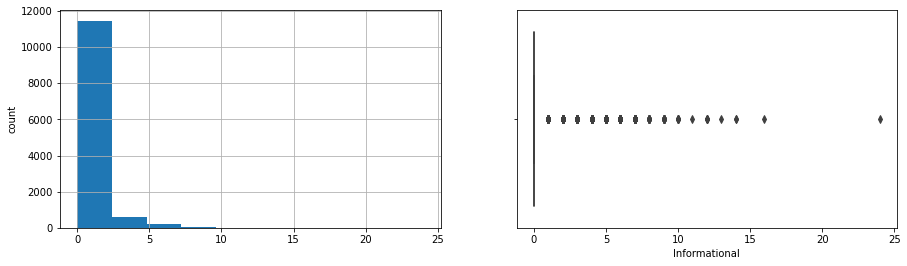

Informational_Duration
Skew : 7.58


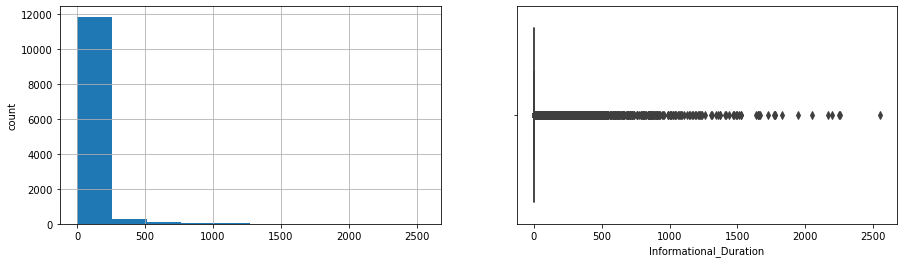

ProductRelated
Skew : 4.34


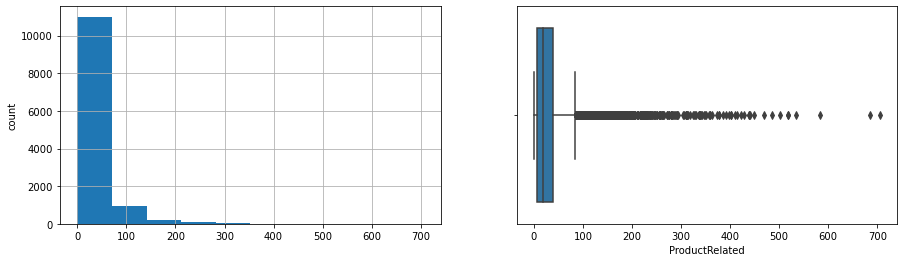

ProductRelated_Duration
Skew : 7.26


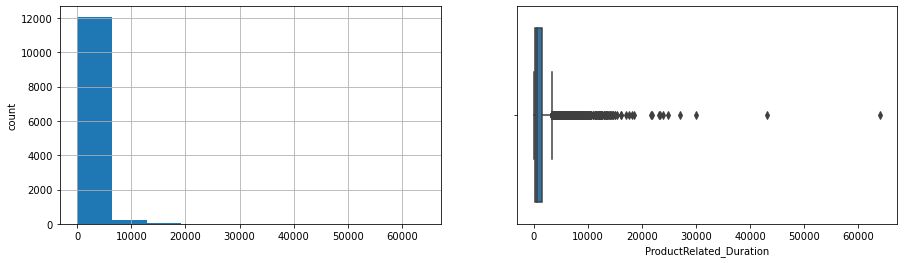

BounceRates
Skew : 2.95


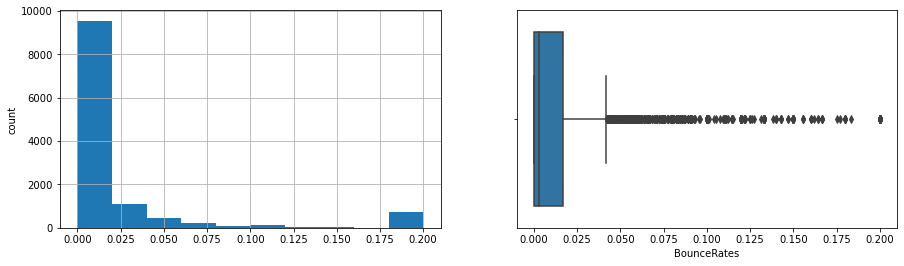

ExitRates
Skew : 2.15


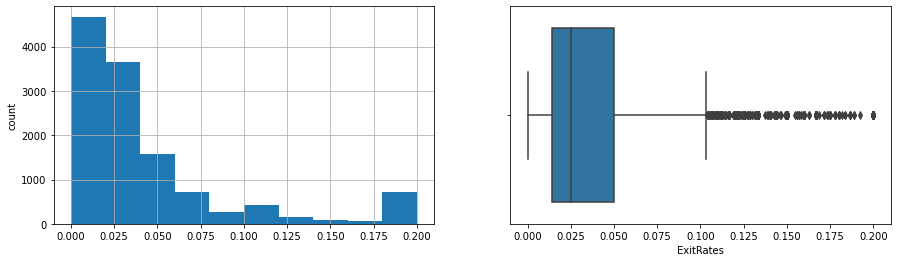

PageValues
Skew : 6.38


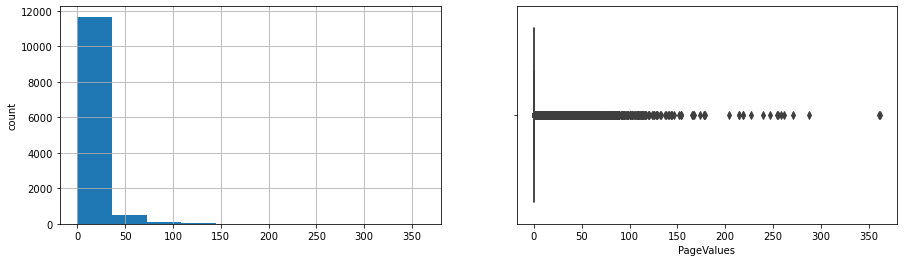

SpecialDay
Skew : 3.3


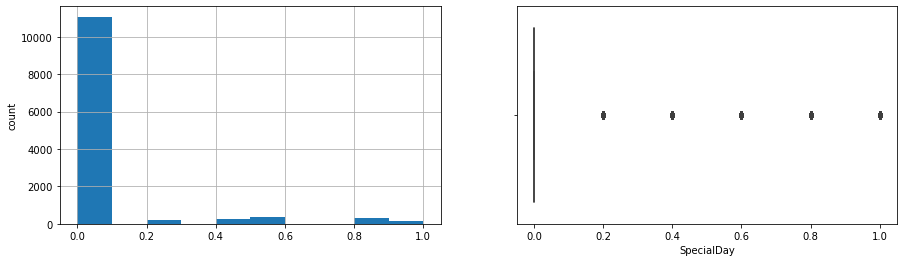

Month
Skew : -0.06


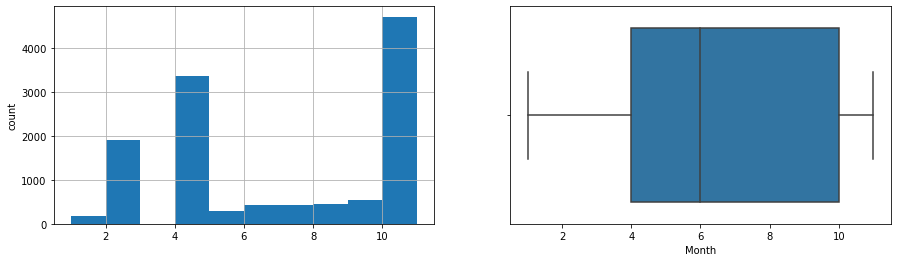

OperatingSystems
Skew : 2.07


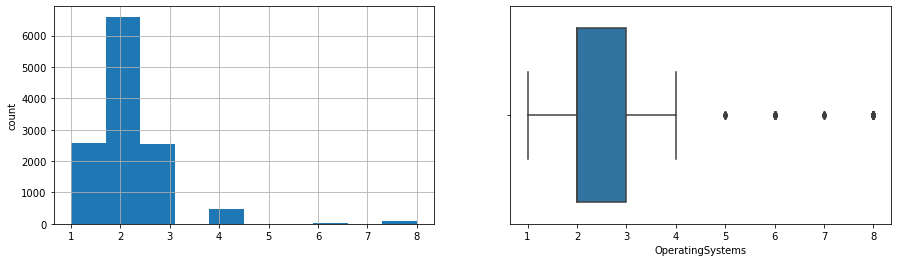

Browser
Skew : 3.24


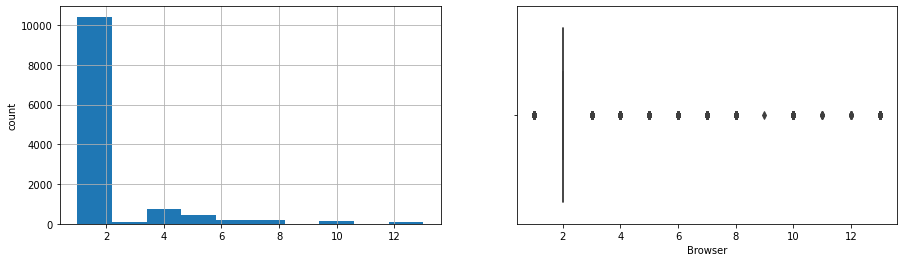

Region
Skew : 0.98


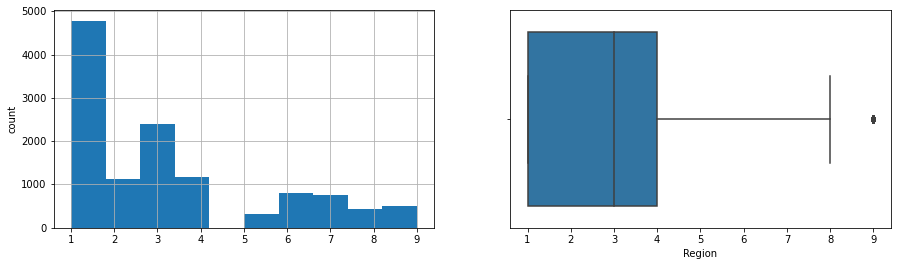

TrafficType
Skew : 1.96


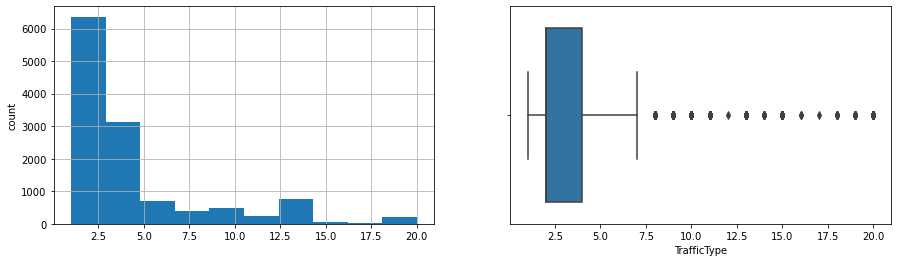

VisitorType
Skew : -2.07


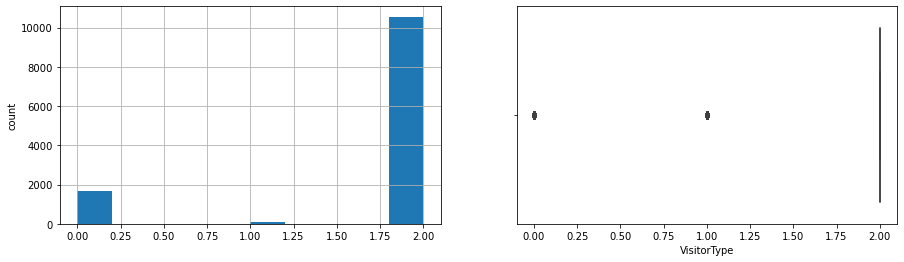

Weekend
Skew : 1.27


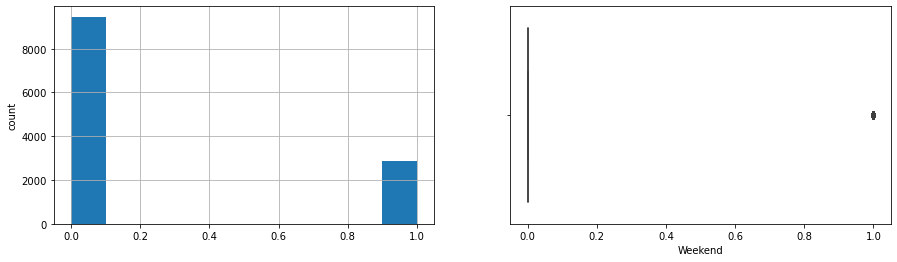

Revenue
Skew : 1.91


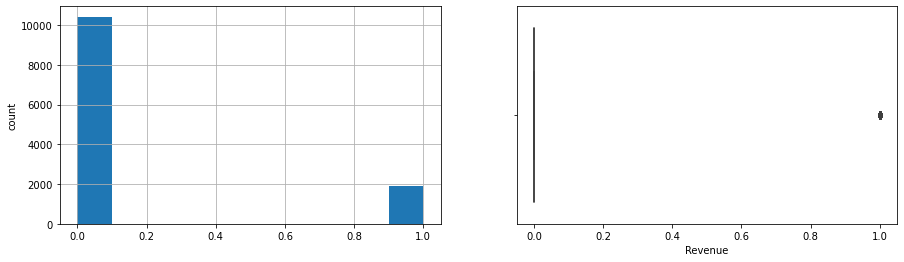

In [311]:
for col in past.columns:
     print(col)
     print('Skew :',round(past[col].skew(),2))
     plt.figure(figsize=(15,4))
     plt.subplot(1,2,1)
     past[col].hist()
     plt.ylabel('count')
     plt.subplot(1,2,2)
     sns.boxplot(x= past[col])
     plt.show()

In [312]:
#past['Administrative'].value_counts()
#past['Administrative_Duration'].value_counts()
#past['Revenue'].value_counts()
#past['Revenue'].mean()
past['VisitorType'].value_counts()

2    10551
0     1694
1       85
Name: VisitorType, dtype: int64

In [313]:
past.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,1,1,1,1,1,2,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,1,2,2,1,2,2,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,1,4,1,9,3,2,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,1,3,2,2,4,2,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,1,3,3,1,4,2,1,0


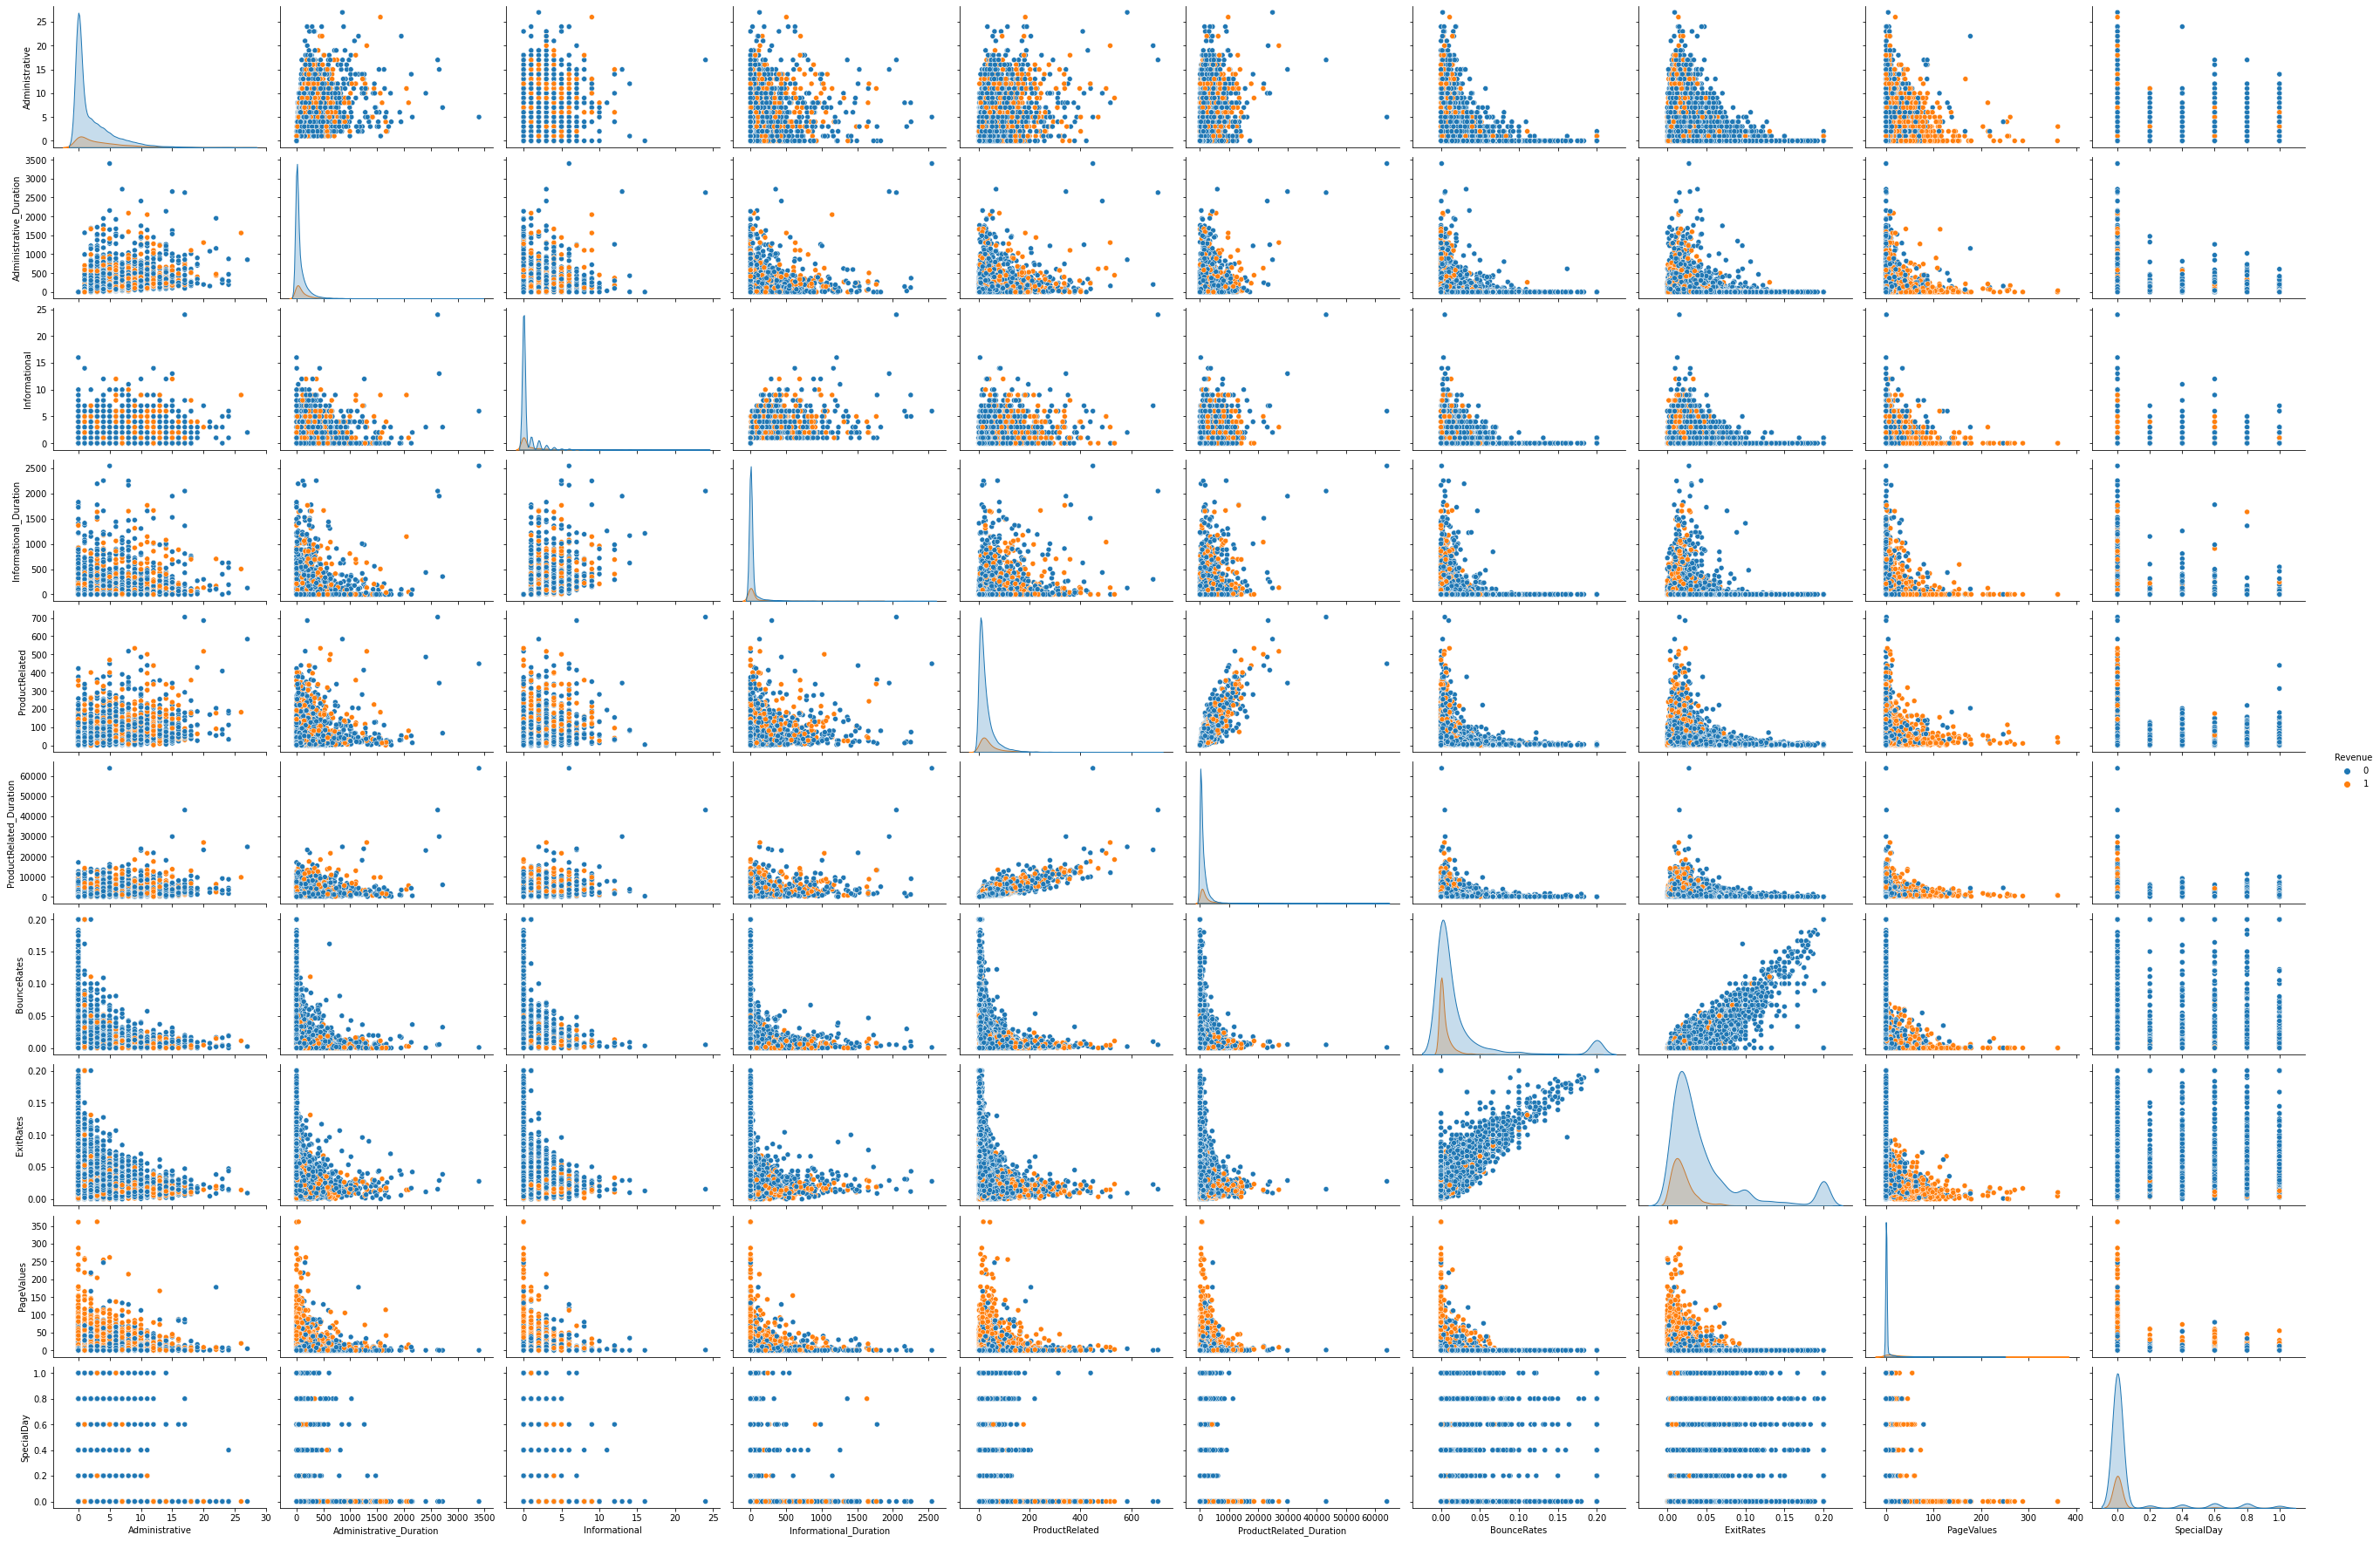

In [314]:
# Let's see our data in a detailed way with pairplot
import seaborn as sns
import matplotlib.pyplot as plt
#X = df.drop(['CustomerID', 'Gender'], axis=1)
sns.pairplot(past.drop(past.iloc[:, 10:17], inplace = False, axis = 1), hue='Revenue', aspect=1.5)
plt.show()

# Checking correlation

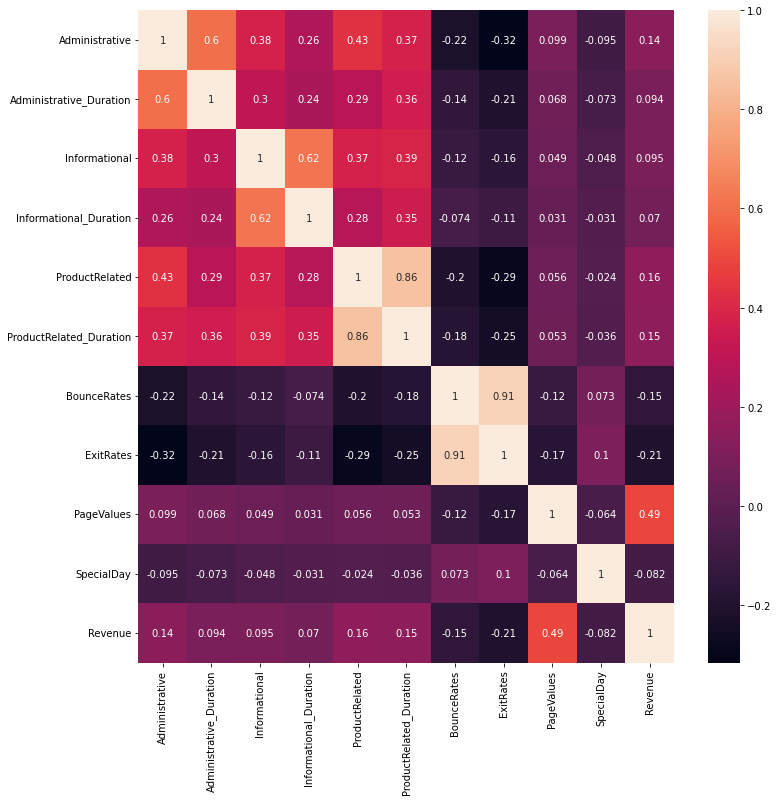

In [315]:
plt.figure(figsize=(12,12))
#sns.heatmap(past.drop(past.iloc[:, 10:17], inplace = False, axis = 1), annot=True)
data = past.drop(past.iloc[:, 10:17], inplace = False, axis = 1) 
sns.heatmap(data.corr(), annot=True)
plt.show()

## Prepare training data

In [316]:
#Prepare training data
X_june_dec = past.loc[(past['Month'] >= 6) & (past['Month'] <= 12)]
X_train = X_june_dec.loc[:, X_june_dec.columns != 'Revenue']
y_train = X_june_dec['Revenue']

#Prepare test data
X_feb_march = past.loc[(past['Month'] >= 2) & (past['Month'] <= 3)]
X_test = X_feb_march.loc[:, X_feb_march.columns != 'Revenue']
y_test = X_feb_march['Revenue']

## Predictive classification model

In [317]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline

pipe=make_pipeline(StandardScaler(), LogisticRegression(class_weight='balanced'))
#pipe=make_pipeline(StandardScaler(), LogisticRegression())

clf = pipe.fit(X_train, y_train)

print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.90      0.94      1715
           1       0.49      0.90      0.64       192

    accuracy                           0.90      1907
   macro avg       0.74      0.90      0.79      1907
weighted avg       0.94      0.90      0.91      1907



# without balancing

In [318]:
#pipe=make_pipeline(StandardScaler(), LogisticRegression())
pipe=make_pipeline(StandardScaler(), LogisticRegression())

clf = pipe.fit(X_train, y_train)

print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      1715
           1       0.79      0.47      0.59       192

    accuracy                           0.93      1907
   macro avg       0.87      0.73      0.78      1907
weighted avg       0.93      0.93      0.93      1907



## Task 2. Customer Segmentation

In [319]:
past.head()
X=past.drop(columns=['ProductRelated', 'ExitRates'])
y=X.pop('Revenue')
X.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated_Duration,BounceRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0.0,0,0.0,0.000000,0.20,0.0,0.0,1,1,1,1,1,2,0
1,0,0.0,0,0.0,64.000000,0.00,0.0,0.0,1,2,2,1,2,2,0
2,0,0.0,0,0.0,0.000000,0.20,0.0,0.0,1,4,1,9,3,2,0
3,0,0.0,0,0.0,2.666667,0.05,0.0,0.0,1,3,2,2,4,2,0
4,0,0.0,0,0.0,627.500000,0.02,0.0,0.0,1,3,3,1,4,2,1


In [320]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

scaler = StandardScaler()
X_scale = scaler.fit_transform(X)
pca = PCA(n_components=5)
X_reduced = pca.fit_transform(X_scale)
#X.shape

In [321]:
X_reduced.shape

(12330, 5)

In [322]:
print(f"percentage of variance: {pca.explained_variance_ratio_}")

percentage of variance: [0.17872077 0.09741901 0.09103004 0.07341427 0.06799105]


In [323]:
#Defining the number of principal components to generate 
#n=data_scaled.shape[1]
n=X_scale.shape[1]
#Finding principal components for the data
pca = PCA(n_components=n,random_state = 1) #Applying the PCA algorithm with random state = 1
data_pca1 = pd.DataFrame(pca.fit_transform(X_scale)) #Fitting and transforming the pca function on scaled data

#The percentage of variance explained by each principal component
exp_var = pca.explained_variance_ratio_
print(f"percentage of variance: {pca.explained_variance_ratio_}")

percentage of variance: [0.17872077 0.09741901 0.09103004 0.07341427 0.06799105 0.06487218
 0.06467018 0.06043032 0.05834709 0.05511451 0.0502445  0.048846
 0.03829887 0.02723335 0.02336785]


Text(0, 0.5, 'Cumulative Explained Variance')

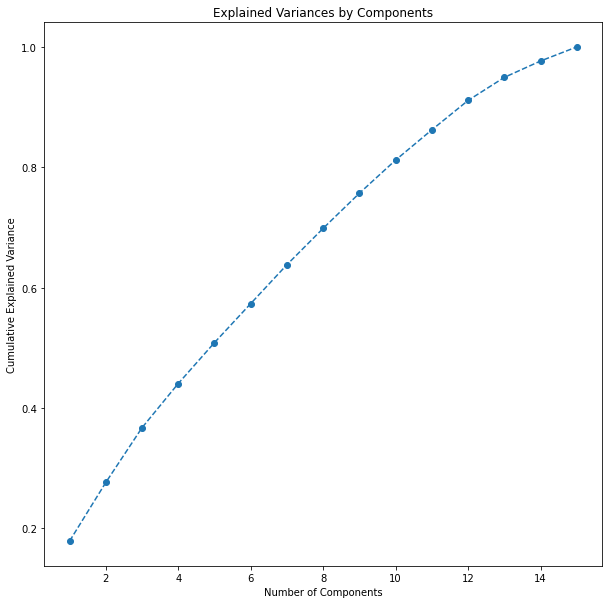

In [324]:
# visualizing the explained variance by individual components
plt.figure(figsize = (10,10))
plt.plot(range(1,16), exp_var.cumsum(), marker = 'o', linestyle = '--')
plt.title("Explained Variances by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")

In [325]:
def visualize_2pcs(pcs, y):
    fig, ax = plt.subplots()
    plot = plt.scatter(pcs[:,0], pcs[:,1], c=y) 
    ax.legend(
        handles=plot.legend_elements()[0], 
        labels=['No', 'Yes'])

In [326]:
def visualize_3pcs(pcs, y):
    fig, ax = plt.subplots()
    ax = fig.add_subplot(projection='3d')
    plot = ax.scatter(pcs[:,0], pcs[:,1], pcs[:,2], c=y)
    ax.legend(
        handles=plot.legend_elements()[0], 
        labels=['No', 'Yes'])

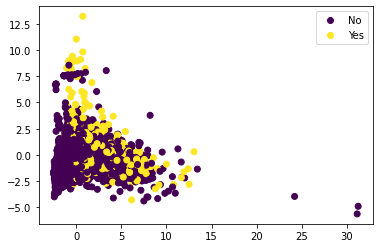

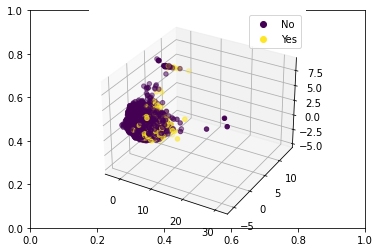

In [327]:
visualize_2pcs(X_reduced,y)
visualize_3pcs(X_reduced,y)

# Kmeans

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f4c1a708310>
Traceback (most recent call last):
  File "/home/sireeshunix/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/sireeshunix/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/sireeshunix/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/sireeshunix/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_itera

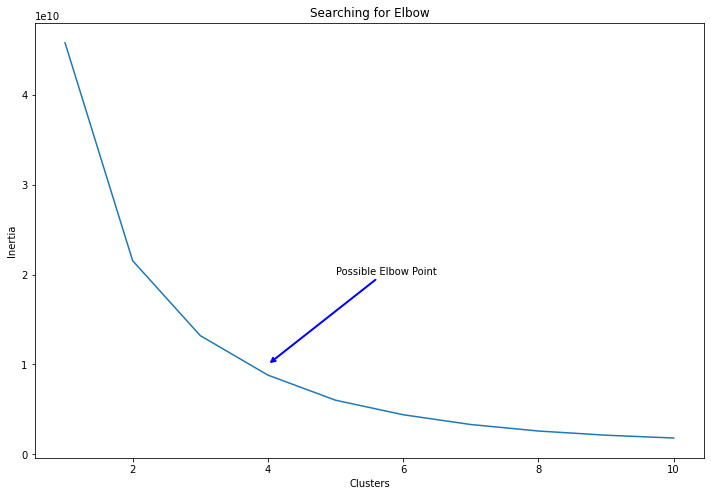

In [328]:
from sklearn.cluster import KMeans

clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

ax.annotate('Possible Elbow Point', xy=(4, 1e10), xytext=(5, 2e10), xycoords='data',          
              arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

plt.show()

/home/sireeshunix/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


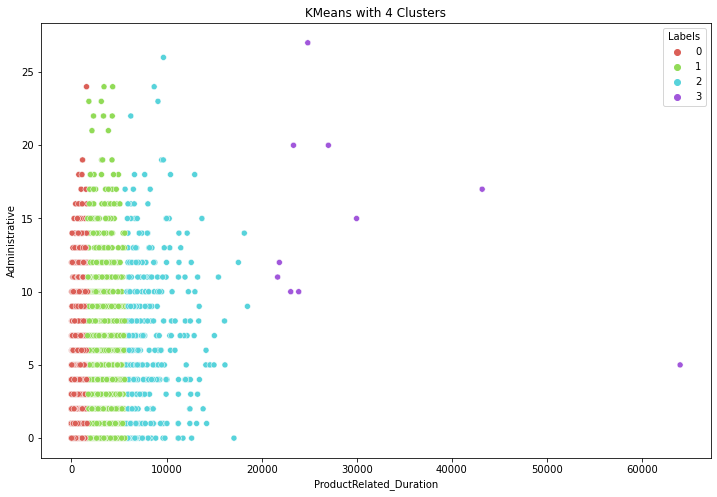

In [329]:
km3 = KMeans(n_clusters=4).fit(X)

X['Labels'] = km3.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(X['ProductRelated_Duration'], X['Administrative'], hue=X['Labels'], 
                palette=sns.color_palette('hls', 4))
plt.title('KMeans with 4 Clusters')
plt.show()

# Number of labels

In [330]:
X['Labels'].value_counts()
X['Labels'].nunique()

4

/home/sireeshunix/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


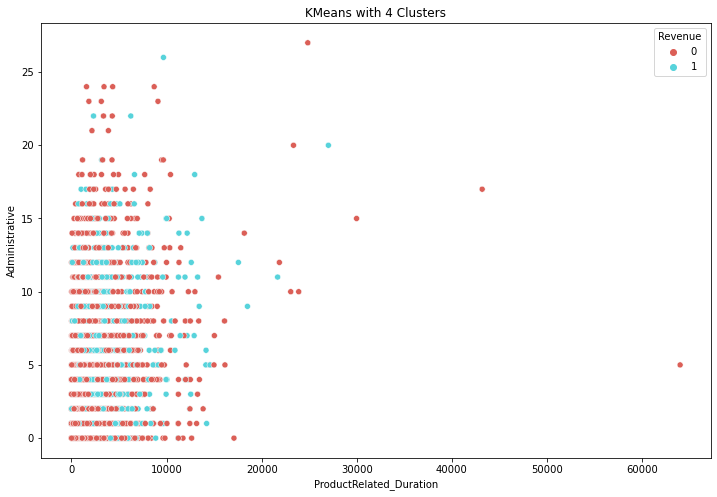

In [331]:
km3 = KMeans(n_clusters=4).fit(X)

X['Labels'] = km3.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(X['ProductRelated_Duration'], X['Administrative'], hue=past['Revenue'], 
                palette=sns.color_palette('hls', 2))
plt.title('KMeans with 4 Clusters')
plt.show()

# Visitor Type 
# 2 - Returning customer
# 0 - New customer 
# 1 - Other

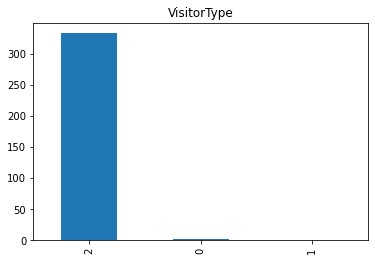

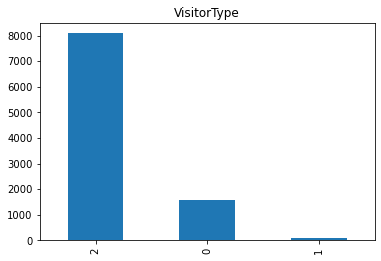

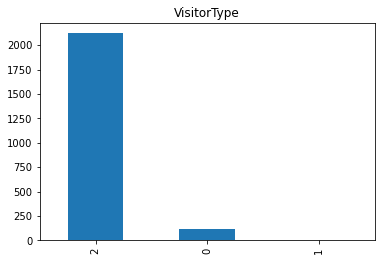

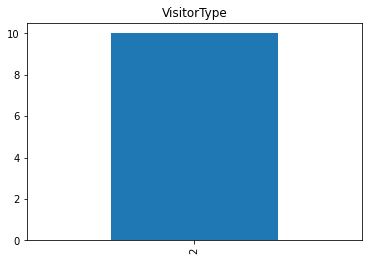

In [332]:
for n in range(0,4):
    plt.show()
    X.loc[X['Labels'] == n]['VisitorType'].value_counts().plot(kind='bar', subplots=True)
#    plt.gca().legend(('2-Returning'))
#    plt.legend(loc="upper left")
plt.show()

/home/sireeshunix/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/sireeshunix/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/sireeshunix/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


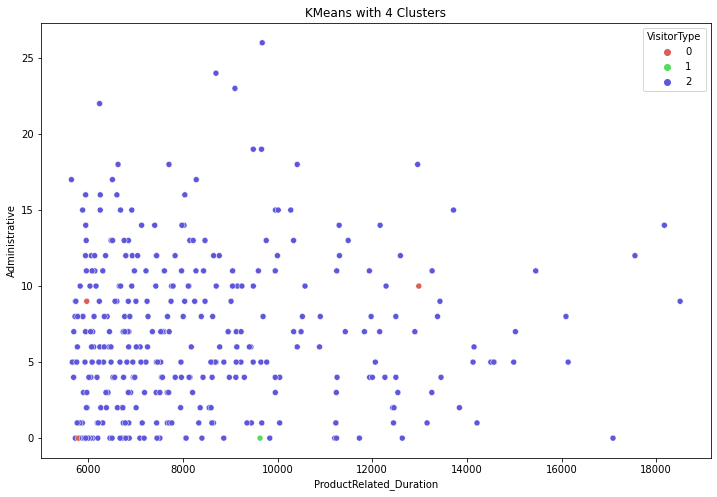

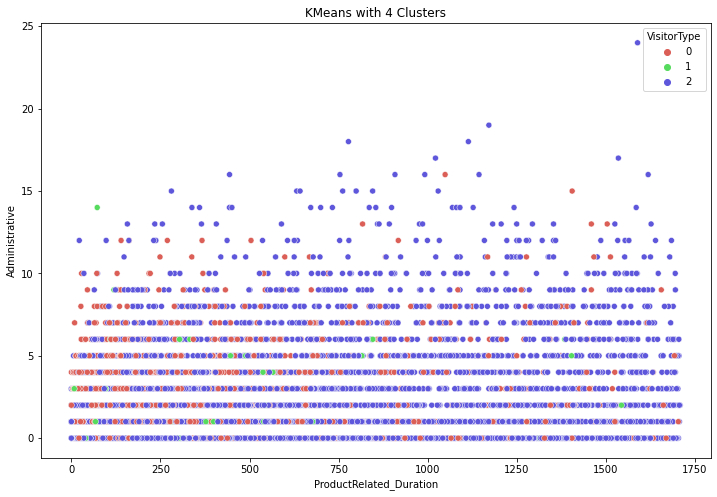

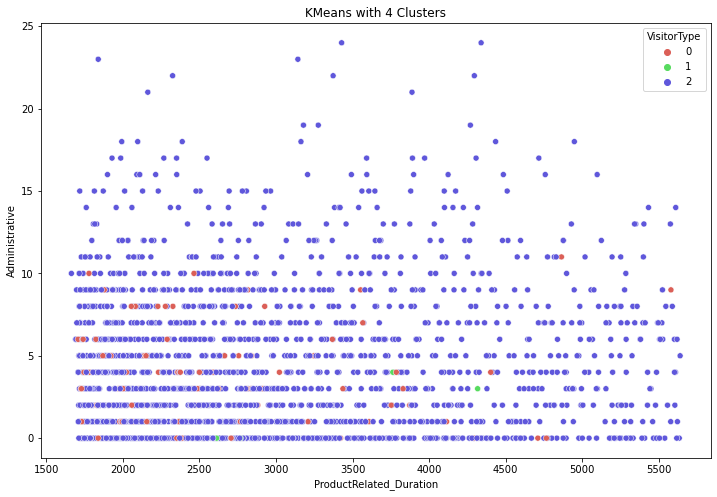

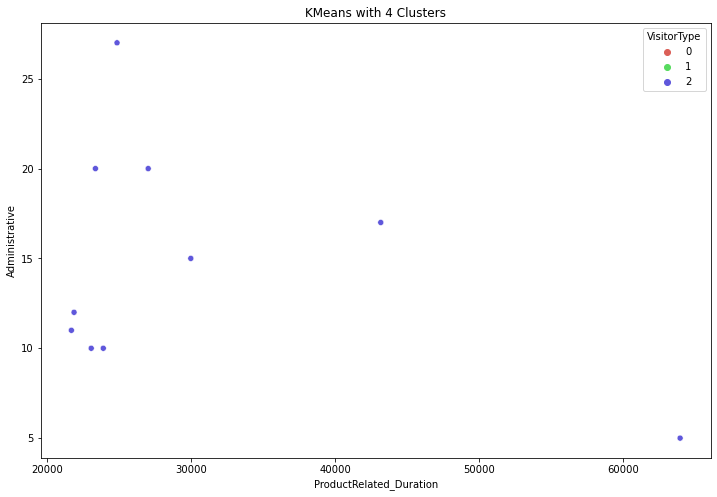

In [335]:
Xlabel3 = X.loc[X['Labels'] == 0]

plt.figure(figsize=(12, 8))
sns.scatterplot(Xlabel3['ProductRelated_Duration'], Xlabel3['Administrative'], hue=past['VisitorType'], 
                palette=sns.color_palette('hls', 3))
plt.title('KMeans with 4 Clusters')

Xlabel3 = X.loc[X['Labels'] == 1]

plt.figure(figsize=(12, 8))
sns.scatterplot(Xlabel3['ProductRelated_Duration'], Xlabel3['Administrative'], hue=past['VisitorType'], 
                palette=sns.color_palette('hls', 3))
plt.title('KMeans with 4 Clusters')

Xlabel3 = X.loc[X['Labels'] == 2]

plt.figure(figsize=(12, 8))
sns.scatterplot(Xlabel3['ProductRelated_Duration'], Xlabel3['Administrative'], hue=past['VisitorType'], 
                palette=sns.color_palette('hls', 3))
plt.title('KMeans with 4 Clusters')

Xlabel3 = X.loc[X['Labels'] == 3]

plt.figure(figsize=(12, 8))
sns.scatterplot(Xlabel3['ProductRelated_Duration'], Xlabel3['Administrative'], hue=past['VisitorType'], 
                palette=sns.color_palette('hls', 3))
plt.title('KMeans with 4 Clusters')

plt.show()

# Task 3: Semi Supervised Learning

In [359]:
#Prepare training data
X_june_sept = past.loc[(past['Month'] >= 6) & (past['Month'] <= 9)]
X1_train = X_june_sept.loc[:, X_june_sept.columns != 'Revenue']
y1_train = X_june_sept['Revenue']

#Prepare test data
X_feb_march = past.loc[(past['Month'] >= 2) & (past['Month'] <= 3)]
X1_test = X_feb_march.loc[:, X_feb_march.columns != 'Revenue']
y1_test = X_feb_march['Revenue']

In [360]:
#X1_train.shape
#y1_train.shape
#X_june_sept.shape
X_june_sept['Month'].value_counts()

9    549
8    448
7    433
6    432
Name: Month, dtype: int64

In [361]:
pipe=make_pipeline(StandardScaler(), LogisticRegression(class_weight='balanced'))
#pipe=make_pipeline(StandardScaler(), LogisticRegression())

clf = pipe.fit(X1_train, y1_train)

print(classification_report(y1_test, clf.predict(X1_test)))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96      1715
           1       0.62      0.89      0.73       192

    accuracy                           0.93      1907
   macro avg       0.80      0.91      0.85      1907
weighted avg       0.95      0.93      0.94      1907



In [363]:
#Prepare training data
X_oct_dec = past.loc[(past['Month'] >= 10) & (past['Month'] <= 12)]
X2_train = X_oct_dec.loc[:, X_oct_dec.columns != 'Revenue']
y2_train = X_oct_dec['Revenue']

In [364]:
X2 = np.concatenate((X1_train, X2_train), axis=0)

In [371]:
y_new = np.full(X2_train.shape[0],-1)
y2 = np.concatenate((y1_train, y_new),axis=0)

In [388]:
y2

array([ 0,  1,  1, ..., -1, -1, -1])

In [376]:
# Label Spreading

In [389]:
from sklearn.semi_supervised import LabelSpreading

label_prop_model = LabelSpreading(kernel='knn', alpha=0.01)
label_prop_model.fit(X2,y2)
label_prop_model.transduction_

array([0, 1, 1, ..., 0, 0, 0])

In [387]:
X2.shape

(6587, 17)

In [394]:
X2.shape

(6587, 17)

In [395]:
clf2 = pipe.fit(X2, label_prop_model.transduction_)

print(classification_report(y1_test, clf2.predict(X1_test)))

              precision    recall  f1-score   support

           0       1.00      0.23      0.37      1715
           1       0.13      1.00      0.22       192

    accuracy                           0.30      1907
   macro avg       0.56      0.61      0.30      1907
weighted avg       0.91      0.30      0.35      1907



/home/sireeshunix/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
